In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [64]:
data = pd.read_csv('Expression.csv', header =None)
data.ix[2,2]

7.1778000000000004

In [83]:
rows = pd.read_csv('Rows.csv')
rows = rows['gene-id']

In [4]:
data = data.ix[:,1:11]

In [84]:
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])

In [6]:
data.values

array([[ 2.1039,  3.4865,  2.3438, ...,  3.9467,  3.3072,  3.4198],
       [ 1.7592,  2.9404,  2.0093, ...,  3.1171,  3.0721,  2.594 ],
       [ 6.1532,  7.1778,  6.5365, ...,  7.4539,  7.3443,  7.4484],
       ..., 
       [ 0.    ,  0.0515,  0.0452, ...,  0.0756,  0.    ,  0.0423],
       [ 2.9131,  3.6975,  3.2306, ...,  4.7206,  4.0709,  3.474 ],
       [ 0.1634,  0.6281,  0.179 , ...,  0.3324,  0.2837,  0.6575]])

In [11]:
#Create new dataframe 
columns = ['Age','Expression Level', 'Gene ID']
df = pd.DataFrame(columns=columns)
df = df_.fillna(0)
#clean_data = pd.DataFrame(0, columns=columns)

In [70]:
#filling out new dataframe to include only information that will be used for K-means
columns = ['Age','Expression Level', 'Gene ID']
df = pd.DataFrame(columns=columns)
for x in range(1,12):
    for y in range(1,331):
        df = df.append([{'Age': age[x-1], 'Expression Level': data.ix[y-1,x], 'Gene ID': rows[y-1]}])
df
    

,Age,Expression Level,Gene ID
0,12.0,2.1039,30786.0
0,12.0,1.7592,0.0
0,12.0,6.1532,865.0
0,12.0,2.3737,34129.0
0,12.0,0.8133,81016.0
0,12.0,2.3806,34829.0
0,12.0,0.2719,0.0
0,12.0,3.3131,34913.0
0,12.0,1.3765,1021095.0
0,12.0,0.0000,0.0


In [148]:
#running k-means on a single age group: 12 PCW
from sklearn.cluster import KMeans


X=df.ix[:,0:2]
X = X.set_index(['Age'])

twelve = X.loc[12.0]
kmeans = KMeans(n_clusters = 6)
kmeans.fit(twelve)

group = kmeans.labels_

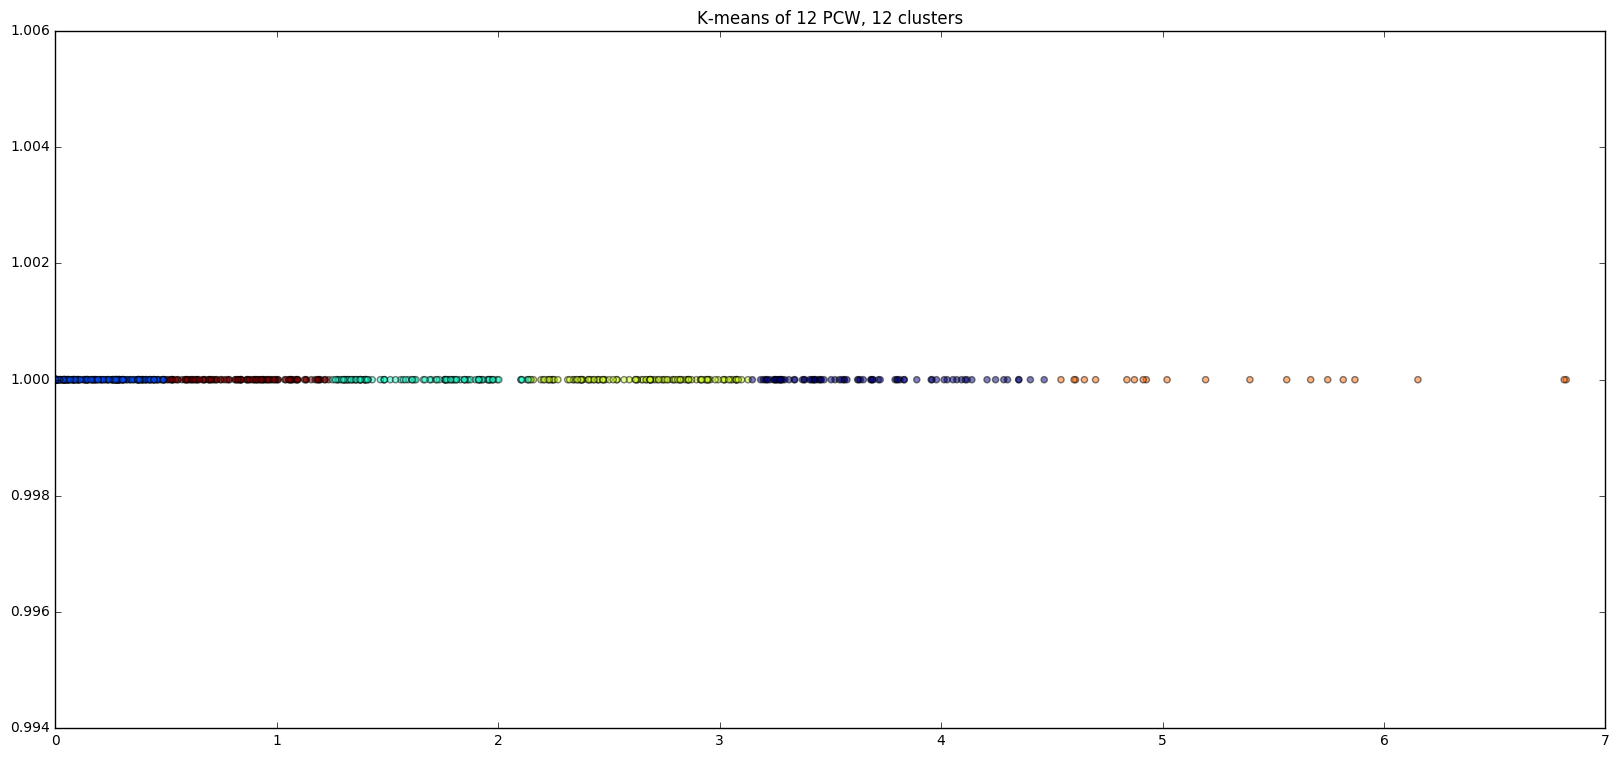

In [149]:
ones = np.ones(660)
plt.scatter(twelve, ones, c=group, alpha=0.5)
plt.xlim(0,7)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('K-means of 12 PCW, 12 clusters')

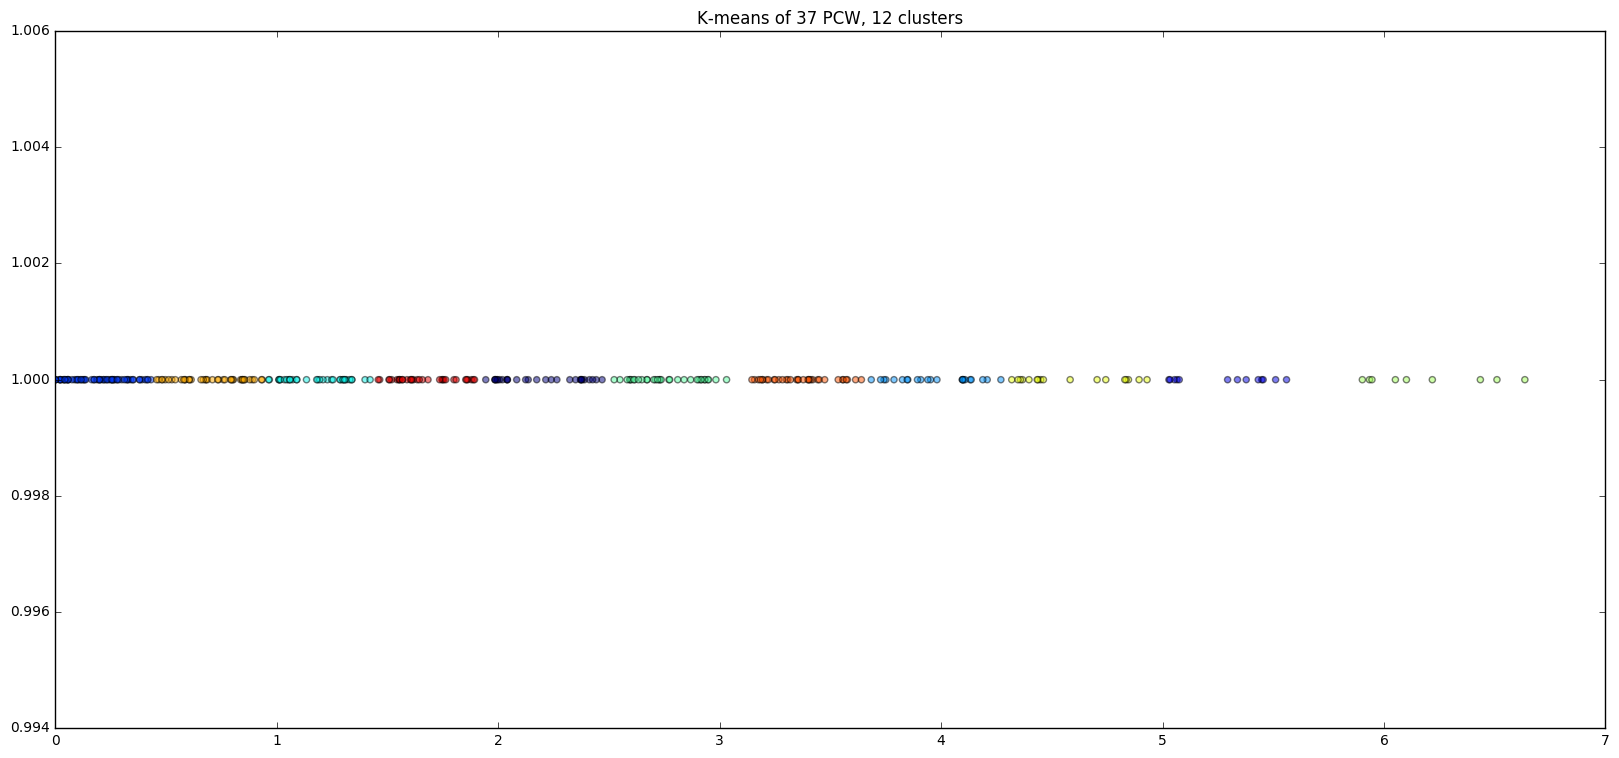

In [147]:
#running k-means on a single age group: 37 PCW
thirtyseven = X.loc[37.0]
kmeans = KMeans(n_clusters = 12)
kmeans.fit(thirtyseven)

group2 = kmeans.labels_

ones = np.ones(330)
plt.scatter(thirtyseven, ones, c=group2, alpha=0.5)
plt.xlim(0,7)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('K-means of 37 PCW, 12 clusters')